# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return False

In [16]:
# Sua análise começa aqui.
amostra = get_sample(athletes, "height", n=3000)
sct.shapiro(amostra)

(0.9961519837379456, 5.681722541339695e-07)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

(0.0, 310.0)

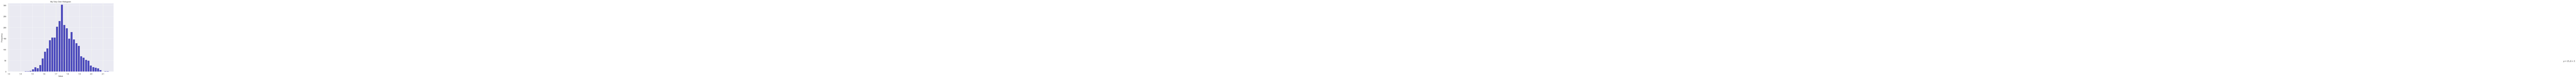

In [17]:
#import matplotlib.pyplot as plt
#
## An "interface" to matplotlib.axes.Axes.hist() method
#n, bins, patches = plt.hist(x=amostra, bins='auto', color='#0504aa',
#                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
## Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


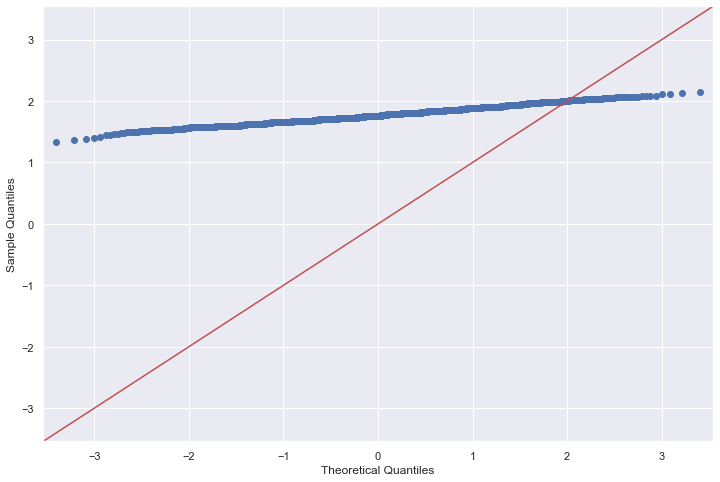

In [19]:

#import numpy as np 
#import statsmodels.api as sm 
#import pylab as py 
#  
#sm.qqplot(amostra, line ='45') 
#py.show() 


## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return False

In [21]:
sct.jarque_bera(amostra)

(13.03363513594265, 0.001478366424594868)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [8]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return False

In [22]:
peso = get_sample(athletes, "weight", n=3000)
sct.normaltest(peso)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

(0.0, 280.0)

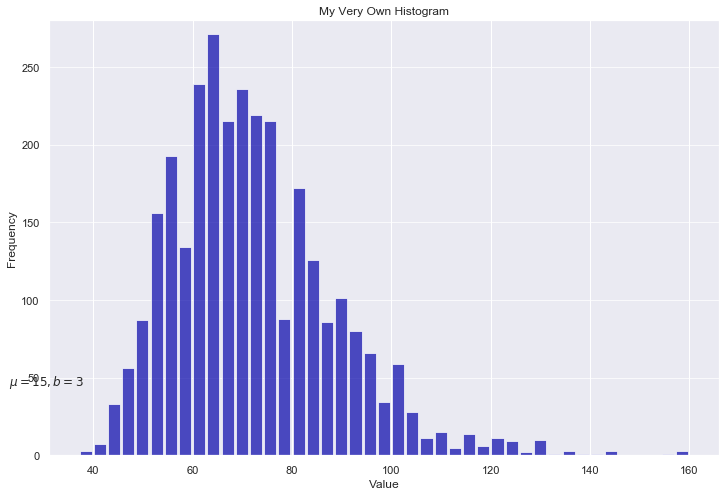

In [24]:
#n, bins, patches = plt.hist(x=peso, bins='auto', color='#0504aa',
#                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
## Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

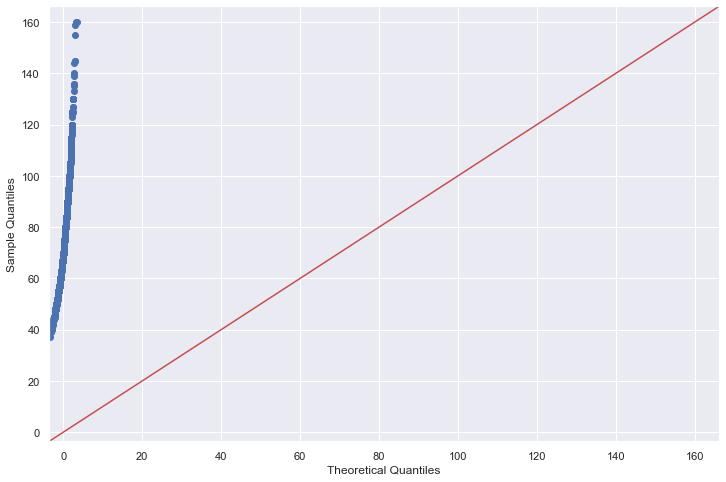

In [23]:
#sm.qqplot(peso, line ='45') 
#py.show() 

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [9]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return False

In [33]:
peso_log = np.log(peso)
print(sct.normaltest(peso_log))
print(sct.jarque_bera(peso_log))
print(sct.shapiro(peso_log))

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)
(47.64955630265282, 4.498112993189807e-11)
(0.9935488104820251, 2.8265334517385554e-10)


(0.0, 350.0)

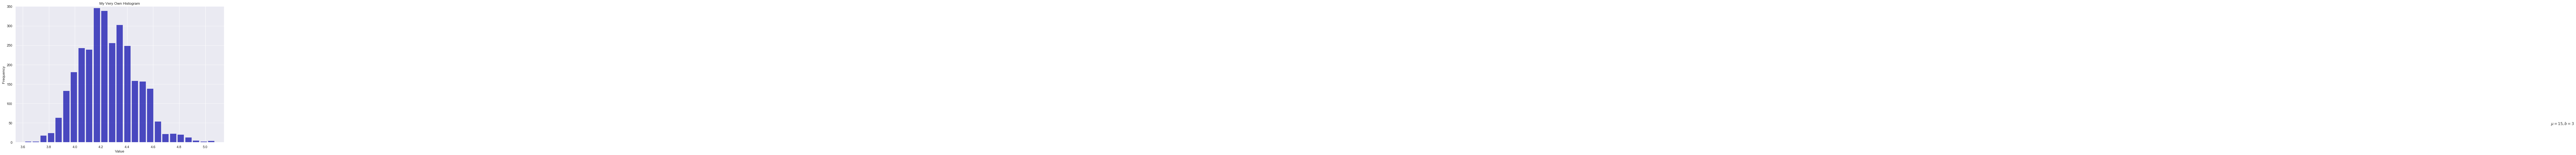

In [34]:
#n, bins, patches = plt.hist(x=peso_log, bins=25, color='#0504aa',
#                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
## Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

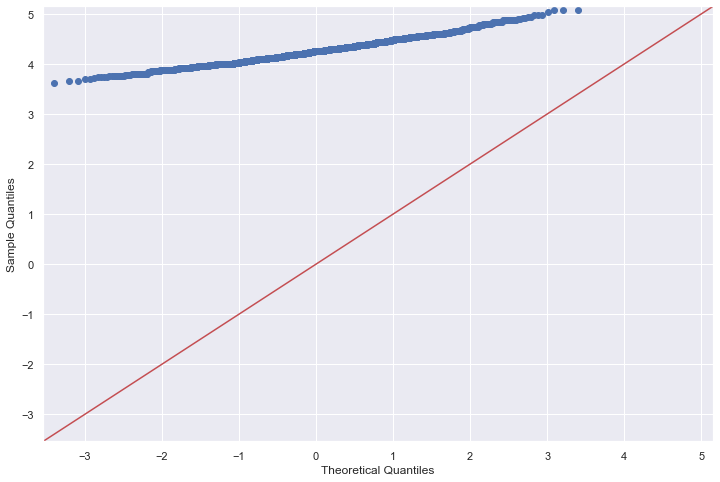

In [29]:
#sm.qqplot(peso_log, line ='45') 
#py.show() 

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [10]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return False

In [85]:
atletas = ["BRA", "USA", "CAN"]
amostra = athletes[athletes["nationality"].isin(atletas)]
brasileiros = athletes[athletes["nationality"].isin(["BRA"])]["height"]
americanos = athletes[athletes["nationality"].isin(["USA"])]["height"]

sct.ttest_ind(americanos.dropna(),brasileiros.dropna(), equal_var=False)

Ttest_indResult(statistic=3.2232436467501553, pvalue=0.0013080041830144061)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return True

In [88]:
def compara_media(str_1, str_2):
    v1 = athletes[athletes["nationality"].isin([str(str_1)])]["height"]
    v2 = athletes[athletes["nationality"].isin([str(str_2)])]["height"]

    return sct.ttest_ind(v1.dropna(), v2.dropna(), equal_var=False)

compara_media("BRA", "CAN")

Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [12]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float(round(compara_media("USA", "CAN")[1],8))

In [96]:
compara_media("USA", "CAN")
a = compara_media("USA", "CAN")
round(a[1],8)

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?